In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import extra_keras_datasets.emnist as emnist
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout

In [2]:
def show_version(pkg):
    print("{0:20}: {1}".format(pkg.__name__, pkg.__version__))
    
show_version(np)
show_version(matplotlib)
show_version(tf)
show_version(keras)

#Step:1-3
# EMNIST-Letters  : https://www.nist.gov/itl/products-and-services/emnist-dataset
(t_images, t_labels), (v_images, v_labels) = emnist.load_data(type="letters")

def show_data_info(label, data):
    print("{:12}: {}, {}".format(label, data.dtype, data.shape))
    
def compatible_image(img):
    if img.ndim == 3 and img.shape[2] == 1:
        img = img.reshape(img.shape[0], img.shape[1])
    return img

def show_image(img):
    plt.rcParams["font.size"] = 10
    plt.figure()
    plt.imshow(compatible_image(img))
    plt.colorbar()
    plt.grid(False)
    plt.show()

INFO:root:Loading dataset = emnist


numpy               : 1.19.2
matplotlib          : 3.3.2
tensorflow          : 2.4.1
tensorflow.keras    : 2.4.0


t_images    : uint8, (124800, 28, 28)
t_labels    : uint8, (124800,)
v_images    : uint8, (20800, 28, 28)
v_labels    : uint8, (20800,)


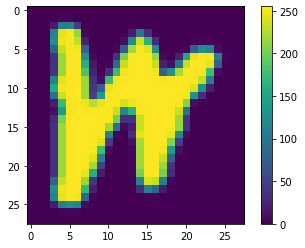

In [3]:
# Step 1-4
# 28*28 픽셀 이미지 데이터, 훈련데이터 124800, 평가데이터 20800
# 27개의 분류, 0~26 정답레이블. 1=A, 2=B, ..., 26=Z
show_data_info("t_images", t_images)  # 3차원
show_data_info("t_labels", t_labels)
show_data_info("v_images", v_images)
show_data_info("v_labels", v_labels)
show_image(t_images[0])

t_images    : float32, (124800, 28, 28, 1)
v_images    : float32, (20800, 28, 28, 1)


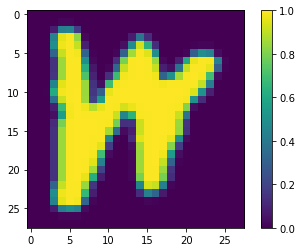

In [4]:
# Step 1-5
# 1) 이미지가 3차원(124800, 28, 28), CNN에서는 4차원 형상으로 변환
#   => (1248, 28, 28, 1) : 회색으로 사용하겠다. (batch, height, width, channel)

def adjust_image(img):
    img = img.astype('float32')
    img = img / 255.0
    img = img.reshape(-1, 28, 28, 1) # 3D -> 4D
    return img

t_images = adjust_image(t_images)
v_images = adjust_image(v_images)

show_data_info("t_images", t_images) # 3차원
show_data_info("v_images", v_images)
show_image(t_images[0])

In [5]:

# step 1-6  모델 정의
# 순차 모델 Conv2D(3) -> MaxPooling2D() -> Conv2D(3) -> MaxPooling2D() -> Flatten()
#   -> Dense(128) -> Dense(27)
import keras
from keras import layers
from keras import models
from keras import optimizers

# 순차 모델 생성
model = models.Sequential()

# Conv2D -> 4
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.Conv2D(32, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.2))

# 1차원
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
          
# 출력
model.add(layers.Dense(27, activation='softmax'))

# step 1-7
opt = keras.optimizers.Adam()
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

model.summary()  # 모델 정보 확인

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          3